In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

In [4]:
elo_ranking = pd.read_csv('data/generated/elo_ranking.csv')

elo_ranking['date'] =  pd.to_datetime(elo_ranking['date'], format='%Y-%m-%d')
elo_ranking["year"] = elo_ranking["date"].dt.year
elo_ranking = elo_ranking.drop(['Unnamed: 0'], axis=1)
elo_ranking.tail(2)

,team,elo,date
78258,India,1442.537649,2018-06-04
78259,Kenya,1485.630351,2018-06-04


In [44]:
player_stats = pd.read_csv('data/generated/team_level_player_data.csv')
player_stats = player_stats.drop(['Unnamed: 0'], axis=1)
player_stats.tail()

,nationality,year,overall_rating_max,overall_rating_min,overall_rating_avg,potential_max,potential_min,potential_avg,height,weight,...,Sprint_Speed,Reactions,Shot_Power,Stamina,Strength,Long_Shots,Aggression,Penalties,Marking,Standing_Tackle
1763,Zimbabwe,2014,71,48,55.246154,75,57,58.569231,159.646154,65.769231,...,82.000000,66.8,68.4,72.4,64.2,57.4,69.2,67.666667,61.666667,56.4
1764,Zimbabwe,2015,69,54,55.554545,71,57,59.563636,159.790909,64.390909,...,84.000000,65.4,67.0,68.9,62.8,58.0,67.6,64.000000,59.666667,58.6
1765,Zimbabwe,2016,71,50,56.769231,77,61,60.784615,159.230769,64.523077,...,82.000000,68.0,71.6,72.1,67.0,59.8,75.0,71.333333,65.666667,60.0
1766,Zimbabwe,2017,75,55,59.670000,79,55,62.190000,159.930000,65.250000,...,77.666667,68.2,75.2,67.4,62.0,58.9,72.8,72.666667,60.333333,50.2
1767,Zimbabwe,2018,77,55,59.746154,83,55,64.038462,161.307692,65.700000,...,86.333333,70.0,71.0,74.9,69.5,54.4,81.4,69.333333,70.333333,72.4


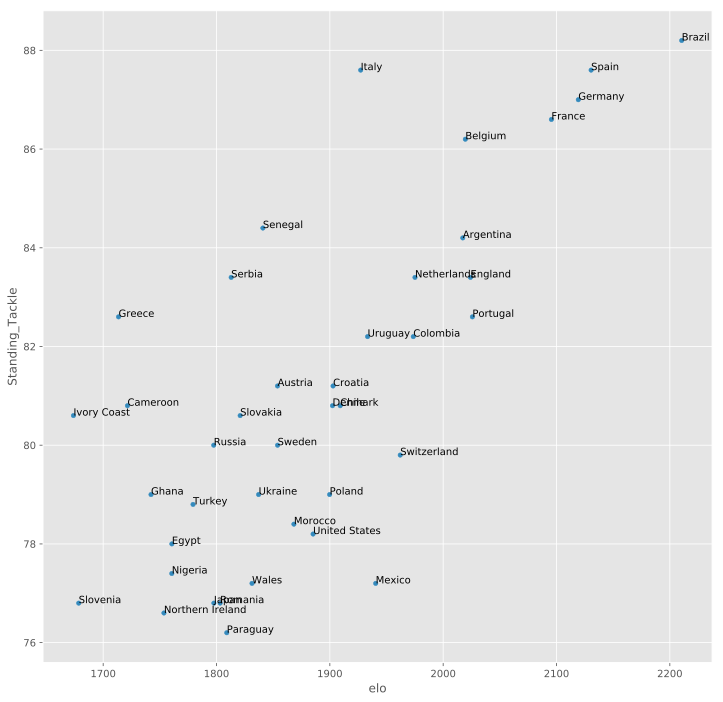

In [45]:
rank_data = pd.merge(elo_ranking, player_stats, how='inner', left_on=['year', 'team'], right_on = ['year','nationality'])

x_col = "elo"
y_col = "Standing_Tackle"

last = rank_data[rank_data["year"] > 2017].groupby("team").last()
last = last.sort_values(by=[y_col], ascending=False)
last = last.head(40)
ax = last.plot.scatter(x=x_col, y=y_col, figsize=(12, 12))
for i, team in enumerate(last.index.values):
    ax.annotate(team, (last[x_col].iloc[i], last[y_col].iloc[i]))

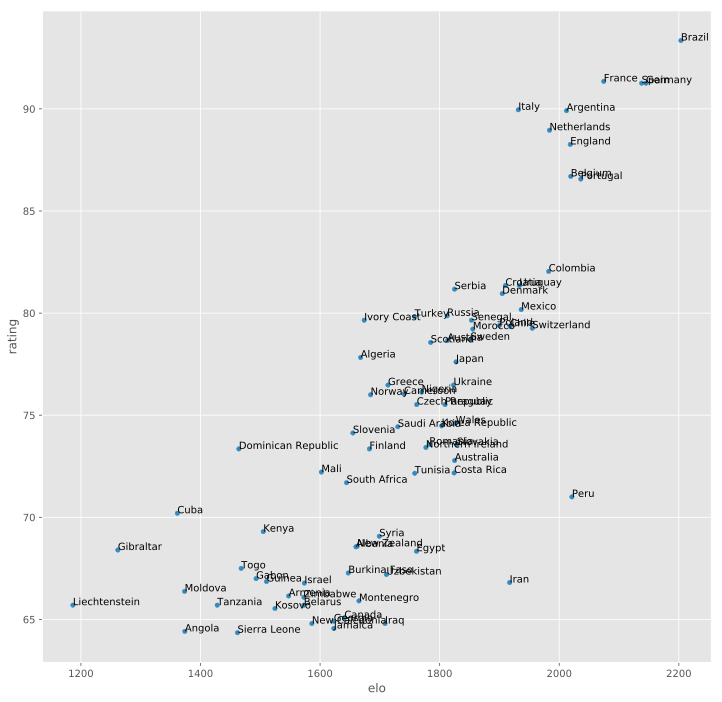

In [123]:
rank_data["year"] = rank_data["date"].dt.year

rank_with_player = pd.merge(rank_data, player_stats, how='inner', left_on=['year', 'team'], right_on = ['year','NATIONALITY'])

last = rank_with_player[rank_with_player["year"] > 2017].groupby("team").last()
last = last.sort_values(by=['rating'], ascending=False)
last = last.head(80)
ax = last.plot.scatter(x="elo", y="rating", figsize=(12, 12))
for i, team in enumerate(last.index.values):
    ax.annotate(team, (last["elo"].iloc[i], last["rating"].iloc[i]))

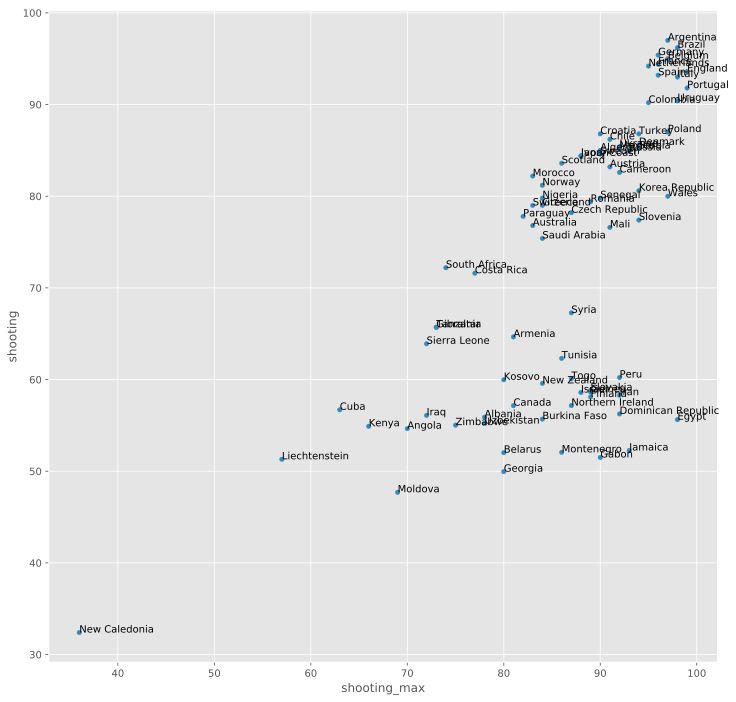

In [130]:
last = rank_with_player[rank_with_player["year"] > 2017].groupby("team").last()
last = last.sort_values(by=['rating'], ascending=False)
last = last.head(80)
ax = last.plot.scatter(x="shooting_max", y="shooting", figsize=(12, 12))
for i, team in enumerate(last.index.values):
    ax.annotate(team, (last["shooting_max"].iloc[i], last["shooting"].iloc[i]))